In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm

In [2]:
session=cc.database.create_session()

In [3]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/35105/status,
Dashboard: /proxy/35105/status,Workers: 4
Total threads: 16,Total memory: 44.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43029,Workers: 4
Dashboard: /proxy/35105/status,Total threads: 16
Started: Just now,Total memory: 44.92 GiB
Comm: tcp://127.0.0.1:41977,Total threads: 4
Dashboard: /proxy/44483/status,Memory: 11.23 GiB
Nanny: tcp://127.0.0.1:44583,


### Hycom1-v1 firstly

In [4]:
expt = 'panant-01-hycom1'

In [5]:
# time period
start_time = '1995-01-01'
end_time = '2000-01-01'

In [6]:
# load umo and hmo
umo = cc.querying.getvar(expt,'umo', session, start_time=start_time, end_time=end_time).sel(time = slice(start_time,end_time))
hmo = cc.querying.getvar(expt,'hmo',session,start_time=start_time, end_time=end_time).sel(time = slice(start_time,end_time))

In [7]:
# set different density layers
rho1 = 1037.06
rho2 = 1037.10
rho3 = 1037.15
rho4 = 1037.20

Now we compuetr streamfunction in different layers

In [8]:
# lower than 1037.06
flux1 = (umo.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(0,rho1)).cumsum('yh').sum('rho2_l')/1e9).load()
h1 = hmo.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(0,rho1)).sum('rho2_l').load()

In [9]:
# 1037.06 - 1037.10
flux2 = (umo.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho1,rho2)).cumsum('yh').sum('rho2_l')/1e9).load()
h2 = hmo.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho1,rho2)).sum('rho2_l').load()

In [10]:
# 1037.10 - 1037.15
flux3 = (umo.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho2,rho3)).cumsum('yh').sum('rho2_l')/1e9).load()
h3 = hmo.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho2,rho3)).sum('rho2_l').load()

In [11]:
# 1037.15 - 1037.20
flux4 = (umo.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho3,rho4)).cumsum('yh').sum('rho2_l')/1e9).load()
h4 = hmo.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho3,rho4)).sum('rho2_l').load()

In [12]:
# upper than 1037.20
flux5 = (umo.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho4,1038.)).cumsum('yh').sum('rho2_l')/1e9).load()
h5 = hmo.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho4,1038.)).sum('rho2_l').load()

Now we can select different transects

In [13]:
x1=-50
depth1 = np.stack([0.0*h1.sel(xh=x1,method='nearest').values,
                   h1.sel(xh=x1,method='nearest').values,
                   (h1+h2).sel(xh=x1,method='nearest').values,
                   (h1+h2+h3).sel(xh=x1,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x1,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x1,method='nearest').values])
fluxes1 = np.stack([flux1.sel(xq=x1,method='nearest').values,
                   flux2.sel(xq=x1,method='nearest').values,
                    flux3.sel(xq=x1,method='nearest').values,
                    flux4.sel(xq=x1,method='nearest').values,
                    flux5.sel(xq=x1,method='nearest').values])

In [14]:
x2=-30
depth2 = np.stack([0.0*h1.sel(xh=x2,method='nearest').values,
                   h1.sel(xh=x2,method='nearest').values,
                   (h1+h2).sel(xh=x2,method='nearest').values,
                   (h1+h2+h3).sel(xh=x2,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x2,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x2,method='nearest').values])
fluxes2 = np.stack([flux1.sel(xq=x2,method='nearest').values,
                   flux2.sel(xq=x2,method='nearest').values,
                    flux3.sel(xq=x2,method='nearest').values,
                    flux4.sel(xq=x2,method='nearest').values,
                    flux5.sel(xq=x2,method='nearest').values])

In [15]:
x3=0
depth3 = np.stack([0.0*h1.sel(xh=x3,method='nearest').values,
                   h1.sel(xh=x3,method='nearest').values,
                   (h1+h2).sel(xh=x3,method='nearest').values,
                   (h1+h2+h3).sel(xh=x3,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x3,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x3,method='nearest').values])
fluxes3 = np.stack([flux1.sel(xq=x3,method='nearest').values,
                   flux2.sel(xq=x3,method='nearest').values,
                    flux3.sel(xq=x3,method='nearest').values,
                    flux4.sel(xq=x3,method='nearest').values,
                    flux5.sel(xq=x3,method='nearest').values])

In [16]:
x4=30
depth4 = np.stack([0.0*h1.sel(xh=x4,method='nearest').values,
                   h1.sel(xh=x4,method='nearest').values,
                   (h1+h2).sel(xh=x4,method='nearest').values,
                   (h1+h2+h3).sel(xh=x4,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x4,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x4,method='nearest').values])
fluxes4 = np.stack([flux1.sel(xq=x4,method='nearest').values,
                   flux2.sel(xq=x4,method='nearest').values,
                    flux3.sel(xq=x4,method='nearest').values,
                    flux4.sel(xq=x4,method='nearest').values,
                    flux5.sel(xq=x4,method='nearest').values])

In [17]:
x5=60
depth5 = np.stack([0.0*h1.sel(xh=x5,method='nearest').values,
                   h1.sel(xh=x5,method='nearest').values,
                   (h1+h2).sel(xh=x5,method='nearest').values,
                   (h1+h2+h3).sel(xh=x5,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x5,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x5,method='nearest').values])
fluxes5 = np.stack([flux1.sel(xq=x5,method='nearest').values,
                   flux2.sel(xq=x5,method='nearest').values,
                    flux3.sel(xq=x5,method='nearest').values,
                    flux4.sel(xq=x5,method='nearest').values,
                    flux5.sel(xq=x5,method='nearest').values])

In [18]:
x6=-270
depth6 = np.stack([0.0*h1.sel(xh=x6,method='nearest').values,
                   h1.sel(xh=x6,method='nearest').values,
                   (h1+h2).sel(xh=x6,method='nearest').values,
                   (h1+h2+h3).sel(xh=x6,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x6,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x6,method='nearest').values])
fluxes6 = np.stack([flux1.sel(xq=x6,method='nearest').values,
                   flux2.sel(xq=x6,method='nearest').values,
                    flux3.sel(xq=x6,method='nearest').values,
                    flux4.sel(xq=x6,method='nearest').values,
                    flux5.sel(xq=x6,method='nearest').values])

In [19]:
x7=-240
depth7 = np.stack([0.0*h1.sel(xh=x7,method='nearest').values,
                   h1.sel(xh=x7,method='nearest').values,
                   (h1+h2).sel(xh=x7,method='nearest').values,
                   (h1+h2+h3).sel(xh=x7,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x7,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x7,method='nearest').values])
fluxes7 = np.stack([flux1.sel(xq=x7,method='nearest').values,
                   flux2.sel(xq=x7,method='nearest').values,
                    flux3.sel(xq=x7,method='nearest').values,
                    flux4.sel(xq=x7,method='nearest').values,
                    flux5.sel(xq=x7,method='nearest').values])

In [20]:
x8=-210
depth8 = np.stack([0.0*h1.sel(xh=x8,method='nearest').values,
                   h1.sel(xh=x8,method='nearest').values,
                   (h1+h2).sel(xh=x8,method='nearest').values,
                   (h1+h2+h3).sel(xh=x8,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x8,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x8,method='nearest').values])
fluxes8 = np.stack([flux1.sel(xq=x8,method='nearest').values,
                   flux2.sel(xq=x8,method='nearest').values,
                    flux3.sel(xq=x8,method='nearest').values,
                    flux4.sel(xq=x8,method='nearest').values,
                    flux5.sel(xq=x8,method='nearest').values])

In [21]:
x9=-180
depth9 = np.stack([0.0*h1.sel(xh=x9,method='nearest').values,
                   h1.sel(xh=x9,method='nearest').values,
                   (h1+h2).sel(xh=x9,method='nearest').values,
                   (h1+h2+h3).sel(xh=x9,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x9,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x9,method='nearest').values])
fluxes9 = np.stack([flux1.sel(xq=x9,method='nearest').values,
                   flux2.sel(xq=x9,method='nearest').values,
                    flux3.sel(xq=x9,method='nearest').values,
                    flux4.sel(xq=x9,method='nearest').values,
                    flux5.sel(xq=x9,method='nearest').values])

In [22]:
x10=-150
depth10 = np.stack([0.0*h1.sel(xh=x10,method='nearest').values,
                   h1.sel(xh=x10,method='nearest').values,
                   (h1+h2).sel(xh=x10,method='nearest').values,
                   (h1+h2+h3).sel(xh=x10,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x10,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x10,method='nearest').values])
fluxes10 = np.stack([flux1.sel(xq=x10,method='nearest').values,
                   flux2.sel(xq=x10,method='nearest').values,
                    flux3.sel(xq=x10,method='nearest').values,
                    flux4.sel(xq=x10,method='nearest').values,
                    flux5.sel(xq=x10,method='nearest').values])

In [ ]:
x10=-150
depth10 = np.stack([0.0*h1.sel(xh=x10,method='nearest').values,
                   h1.sel(xh=x10,method='nearest').values,
                   (h1+h2).sel(xh=x10,method='nearest').values,
                   (h1+h2+h3).sel(xh=x10,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x10,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x10,method='nearest').values])
fluxes10 = np.stack([flux1.sel(xq=x10,method='nearest').values,
                   flux2.sel(xq=x10,method='nearest').values,
                    flux3.sel(xq=x10,method='nearest').values,
                    flux4.sel(xq=x10,method='nearest').values,
                    flux5.sel(xq=x10,method='nearest').values])

plot the transects

In [ ]:
# set the line color
c = ['k','r','b','m','darkblue','k']
label=['0','1037.06','1037.10','1037.15','1037.20','0']

Text(0, 0.5, 'streamfunction (Sv)')

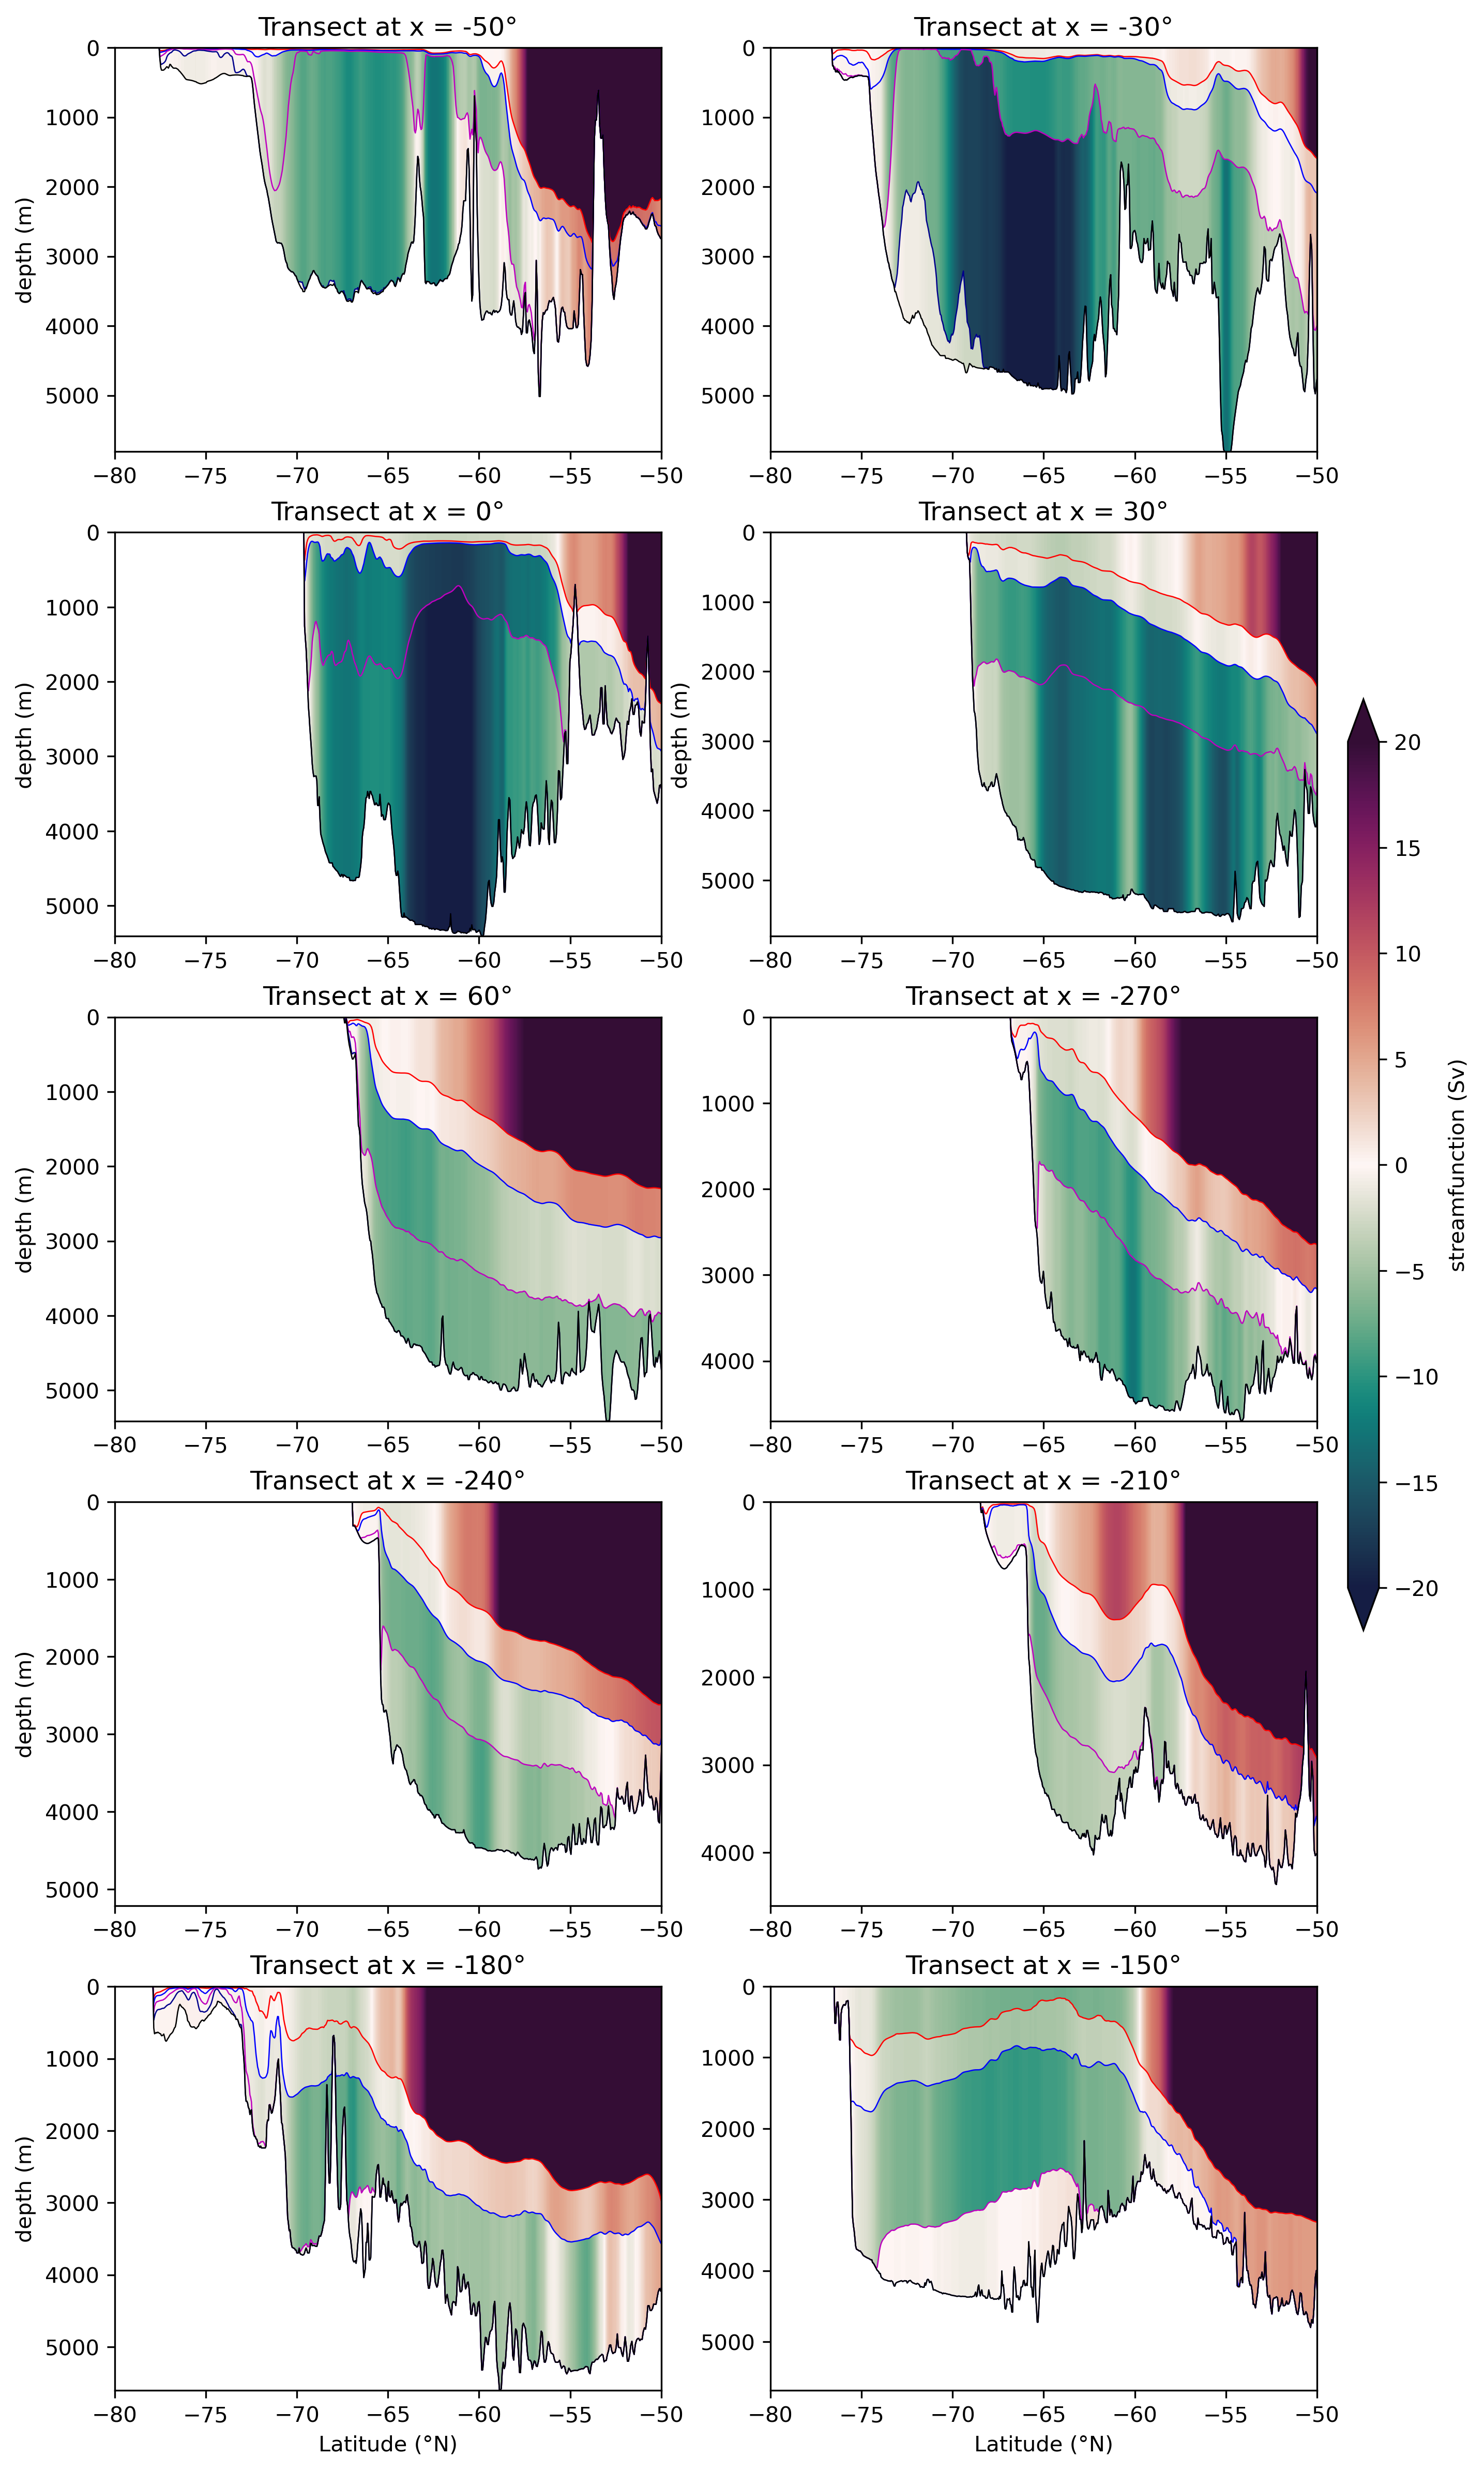

In [24]:
plt.figure(figsize=(10,20),dpi = 300)
# -50
plt.subplot(5,2,1)
p1 = plt.pcolor(flux1.yh.values,depth1,fluxes1[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth1[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = -50°')
plt.xlim(-80,-50)
plt.ylabel('depth (m)')


# -30
plt.subplot(5,2,2)
p1 = plt.pcolor(flux1.yh.values,depth2,fluxes2[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth2[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = -30°')
plt.xlim(-80,-50)


# 0
plt.subplot(5,2,3)
p1 = plt.pcolor(flux1.yh.values,depth3,fluxes3[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth3[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = 0°')
plt.xlim(-80,-50)
plt.ylabel('depth (m)')


# 30
plt.subplot(5,2,4)
p1 = plt.pcolor(flux1.yh.values,depth4,fluxes4[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth4[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = 30°')
plt.xlim(-80,-50)
plt.ylabel('depth (m)')


# 60
plt.subplot(5,2,5)
p1 = plt.pcolor(flux1.yh.values,depth5,fluxes5[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth5[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = 60°')
plt.xlim(-80,-50)
plt.ylabel('depth (m)')

# -270
plt.subplot(5,2,6)
p1 = plt.pcolor(flux1.yh.values,depth6,fluxes6[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth6[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = -270°')
plt.xlim(-80,-50)


# -240
plt.subplot(5,2,7)
p1 = plt.pcolor(flux1.yh.values,depth7,fluxes7[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth7[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = -240°')
plt.xlim(-80,-50)
plt.ylabel('depth (m)')

# -210
plt.subplot(5,2,8)
p1 = plt.pcolor(flux1.yh.values,depth8,fluxes8[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth8[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = -210°')
plt.xlim(-80,-50)


# -180
plt.subplot(5,2,9)
p1 = plt.pcolor(flux1.yh.values,depth9,fluxes9[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth9[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = -180°')
plt.xlim(-80,-50)
plt.ylabel('depth (m)')
plt.xlabel('Latitude (°N)')

# -150
plt.subplot(5,2,10)
p1 = plt.pcolor(flux1.yh.values,depth10,fluxes10[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth10[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = -150°')
plt.xlim(-80,-50)
plt.xlabel('Latitude (°N)')
# add colorbar
ax = plt.axes([0.92, 0.37, 0.02, 0.3])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend = 'both')
cb.ax.set_ylabel('streamfunction (Sv)')

### Panant-v2

In [25]:
expt = 'panant-v2'

In [26]:
# load umo and hmo
umo = cc.querying.getvar(expt,'umo', session, start_time=start_time, end_time=end_time).sel(time = slice(start_time,end_time))
hmo = cc.querying.getvar(expt,'hmo',session,start_time=start_time, end_time=end_time).sel(time = slice(start_time,end_time))

In [27]:
# lower than 1037.06
flux1 = (umo.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(0,rho1)).cumsum('yh').sum('rho2_l')/1e9).load()
h1 = hmo.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(0,rho1)).sum('rho2_l').load()
# 1037.06 - 1037.10
flux2 = (umo.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho1,rho2)).cumsum('yh').sum('rho2_l')/1e9).load()
h2 = hmo.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho1,rho2)).sum('rho2_l').load()
# 1037.10 - 1037.15
flux3 = (umo.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho2,rho3)).cumsum('yh').sum('rho2_l')/1e9).load()
h3 = hmo.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho2,rho3)).sum('rho2_l').load()
# 1037.15 - 1037.20
flux4 = (umo.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho3,rho4)).cumsum('yh').sum('rho2_l')/1e9).load()
h4 = hmo.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho3,rho4)).sum('rho2_l').load()
# upper than 1037.20
flux5 = (umo.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho4,1038.)).cumsum('yh').sum('rho2_l')/1e9).load()
h5 = hmo.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho4,1038.)).sum('rho2_l').load()

In [28]:
x1=-50
depth1 = np.stack([0.0*h1.sel(xh=x1,method='nearest').values,
                   h1.sel(xh=x1,method='nearest').values,
                   (h1+h2).sel(xh=x1,method='nearest').values,
                   (h1+h2+h3).sel(xh=x1,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x1,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x1,method='nearest').values])
fluxes1 = np.stack([flux1.sel(xq=x1,method='nearest').values,
                   flux2.sel(xq=x1,method='nearest').values,
                    flux3.sel(xq=x1,method='nearest').values,
                    flux4.sel(xq=x1,method='nearest').values,
                    flux5.sel(xq=x1,method='nearest').values])

In [29]:
x2=-30
depth2 = np.stack([0.0*h1.sel(xh=x2,method='nearest').values,
                   h1.sel(xh=x2,method='nearest').values,
                   (h1+h2).sel(xh=x2,method='nearest').values,
                   (h1+h2+h3).sel(xh=x2,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x2,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x2,method='nearest').values])
fluxes2 = np.stack([flux1.sel(xq=x2,method='nearest').values,
                   flux2.sel(xq=x2,method='nearest').values,
                    flux3.sel(xq=x2,method='nearest').values,
                    flux4.sel(xq=x2,method='nearest').values,
                    flux5.sel(xq=x2,method='nearest').values])

In [30]:
x3=0
depth3 = np.stack([0.0*h1.sel(xh=x3,method='nearest').values,
                   h1.sel(xh=x3,method='nearest').values,
                   (h1+h2).sel(xh=x3,method='nearest').values,
                   (h1+h2+h3).sel(xh=x3,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x3,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x3,method='nearest').values])
fluxes3 = np.stack([flux1.sel(xq=x3,method='nearest').values,
                   flux2.sel(xq=x3,method='nearest').values,
                    flux3.sel(xq=x3,method='nearest').values,
                    flux4.sel(xq=x3,method='nearest').values,
                    flux5.sel(xq=x3,method='nearest').values])

In [31]:
x4=30
depth4 = np.stack([0.0*h1.sel(xh=x4,method='nearest').values,
                   h1.sel(xh=x4,method='nearest').values,
                   (h1+h2).sel(xh=x4,method='nearest').values,
                   (h1+h2+h3).sel(xh=x4,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x4,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x4,method='nearest').values])
fluxes4 = np.stack([flux1.sel(xq=x4,method='nearest').values,
                   flux2.sel(xq=x4,method='nearest').values,
                    flux3.sel(xq=x4,method='nearest').values,
                    flux4.sel(xq=x4,method='nearest').values,
                    flux5.sel(xq=x4,method='nearest').values])

In [32]:
x5=60
depth5 = np.stack([0.0*h1.sel(xh=x5,method='nearest').values,
                   h1.sel(xh=x5,method='nearest').values,
                   (h1+h2).sel(xh=x5,method='nearest').values,
                   (h1+h2+h3).sel(xh=x5,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x5,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x5,method='nearest').values])
fluxes5 = np.stack([flux1.sel(xq=x5,method='nearest').values,
                   flux2.sel(xq=x5,method='nearest').values,
                    flux3.sel(xq=x5,method='nearest').values,
                    flux4.sel(xq=x5,method='nearest').values,
                    flux5.sel(xq=x5,method='nearest').values])

In [33]:
x6=-270
depth6 = np.stack([0.0*h1.sel(xh=x6,method='nearest').values,
                   h1.sel(xh=x6,method='nearest').values,
                   (h1+h2).sel(xh=x6,method='nearest').values,
                   (h1+h2+h3).sel(xh=x6,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x6,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x6,method='nearest').values])
fluxes6 = np.stack([flux1.sel(xq=x6,method='nearest').values,
                   flux2.sel(xq=x6,method='nearest').values,
                    flux3.sel(xq=x6,method='nearest').values,
                    flux4.sel(xq=x6,method='nearest').values,
                    flux5.sel(xq=x6,method='nearest').values])

In [34]:
x7=-240
depth7 = np.stack([0.0*h1.sel(xh=x7,method='nearest').values,
                   h1.sel(xh=x7,method='nearest').values,
                   (h1+h2).sel(xh=x7,method='nearest').values,
                   (h1+h2+h3).sel(xh=x7,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x7,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x7,method='nearest').values])
fluxes7 = np.stack([flux1.sel(xq=x7,method='nearest').values,
                   flux2.sel(xq=x7,method='nearest').values,
                    flux3.sel(xq=x7,method='nearest').values,
                    flux4.sel(xq=x7,method='nearest').values,
                    flux5.sel(xq=x7,method='nearest').values])

In [35]:
x8=-210
depth8 = np.stack([0.0*h1.sel(xh=x8,method='nearest').values,
                   h1.sel(xh=x8,method='nearest').values,
                   (h1+h2).sel(xh=x8,method='nearest').values,
                   (h1+h2+h3).sel(xh=x8,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x8,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x8,method='nearest').values])
fluxes8 = np.stack([flux1.sel(xq=x8,method='nearest').values,
                   flux2.sel(xq=x8,method='nearest').values,
                    flux3.sel(xq=x8,method='nearest').values,
                    flux4.sel(xq=x8,method='nearest').values,
                    flux5.sel(xq=x8,method='nearest').values])

In [36]:
x9=-180
depth9 = np.stack([0.0*h1.sel(xh=x9,method='nearest').values,
                   h1.sel(xh=x9,method='nearest').values,
                   (h1+h2).sel(xh=x9,method='nearest').values,
                   (h1+h2+h3).sel(xh=x9,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x9,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x9,method='nearest').values])
fluxes9 = np.stack([flux1.sel(xq=x9,method='nearest').values,
                   flux2.sel(xq=x9,method='nearest').values,
                    flux3.sel(xq=x9,method='nearest').values,
                    flux4.sel(xq=x9,method='nearest').values,
                    flux5.sel(xq=x9,method='nearest').values])

In [37]:
x10=-150
depth10 = np.stack([0.0*h1.sel(xh=x10,method='nearest').values,
                   h1.sel(xh=x10,method='nearest').values,
                   (h1+h2).sel(xh=x10,method='nearest').values,
                   (h1+h2+h3).sel(xh=x10,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x10,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x10,method='nearest').values])
fluxes10 = np.stack([flux1.sel(xq=x10,method='nearest').values,
                   flux2.sel(xq=x10,method='nearest').values,
                    flux3.sel(xq=x10,method='nearest').values,
                    flux4.sel(xq=x10,method='nearest').values,
                    flux5.sel(xq=x10,method='nearest').values])

In [44]:
x11=-130
depth11 = np.stack([0.0*h1.sel(xh=x11,method='nearest').values,
                   h1.sel(xh=x11,method='nearest').values,
                   (h1+h2).sel(xh=x11,method='nearest').values,
                   (h1+h2+h3).sel(xh=x11,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x11,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x11,method='nearest').values])
fluxes11 = np.stack([flux1.sel(xq=x11,method='nearest').values,
                   flux2.sel(xq=x11,method='nearest').values,
                    flux3.sel(xq=x11,method='nearest').values,
                    flux4.sel(xq=x11,method='nearest').values,
                    flux5.sel(xq=x11,method='nearest').values])

In [40]:
x12=-120
depth12 = np.stack([0.0*h1.sel(xh=x12,method='nearest').values,
                   h1.sel(xh=x12,method='nearest').values,
                   (h1+h2).sel(xh=x12,method='nearest').values,
                   (h1+h2+h3).sel(xh=x12,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x12,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x12,method='nearest').values])
fluxes12 = np.stack([flux1.sel(xq=x12,method='nearest').values,
                   flux2.sel(xq=x12,method='nearest').values,
                    flux3.sel(xq=x12,method='nearest').values,
                    flux4.sel(xq=x12,method='nearest').values,
                    flux5.sel(xq=x12,method='nearest').values])

In [42]:
umo

,Array,Chunk
Bytes,152.33 GiB,16.09 MiB
Shape,"(48, 70, 1690, 7201)","(1, 12, 287, 1225)"
Count,31585 Tasks,10368 Chunks
Type,float32,numpy.ndarray


Text(0, 0.5, 'streamfunction (Sv)')

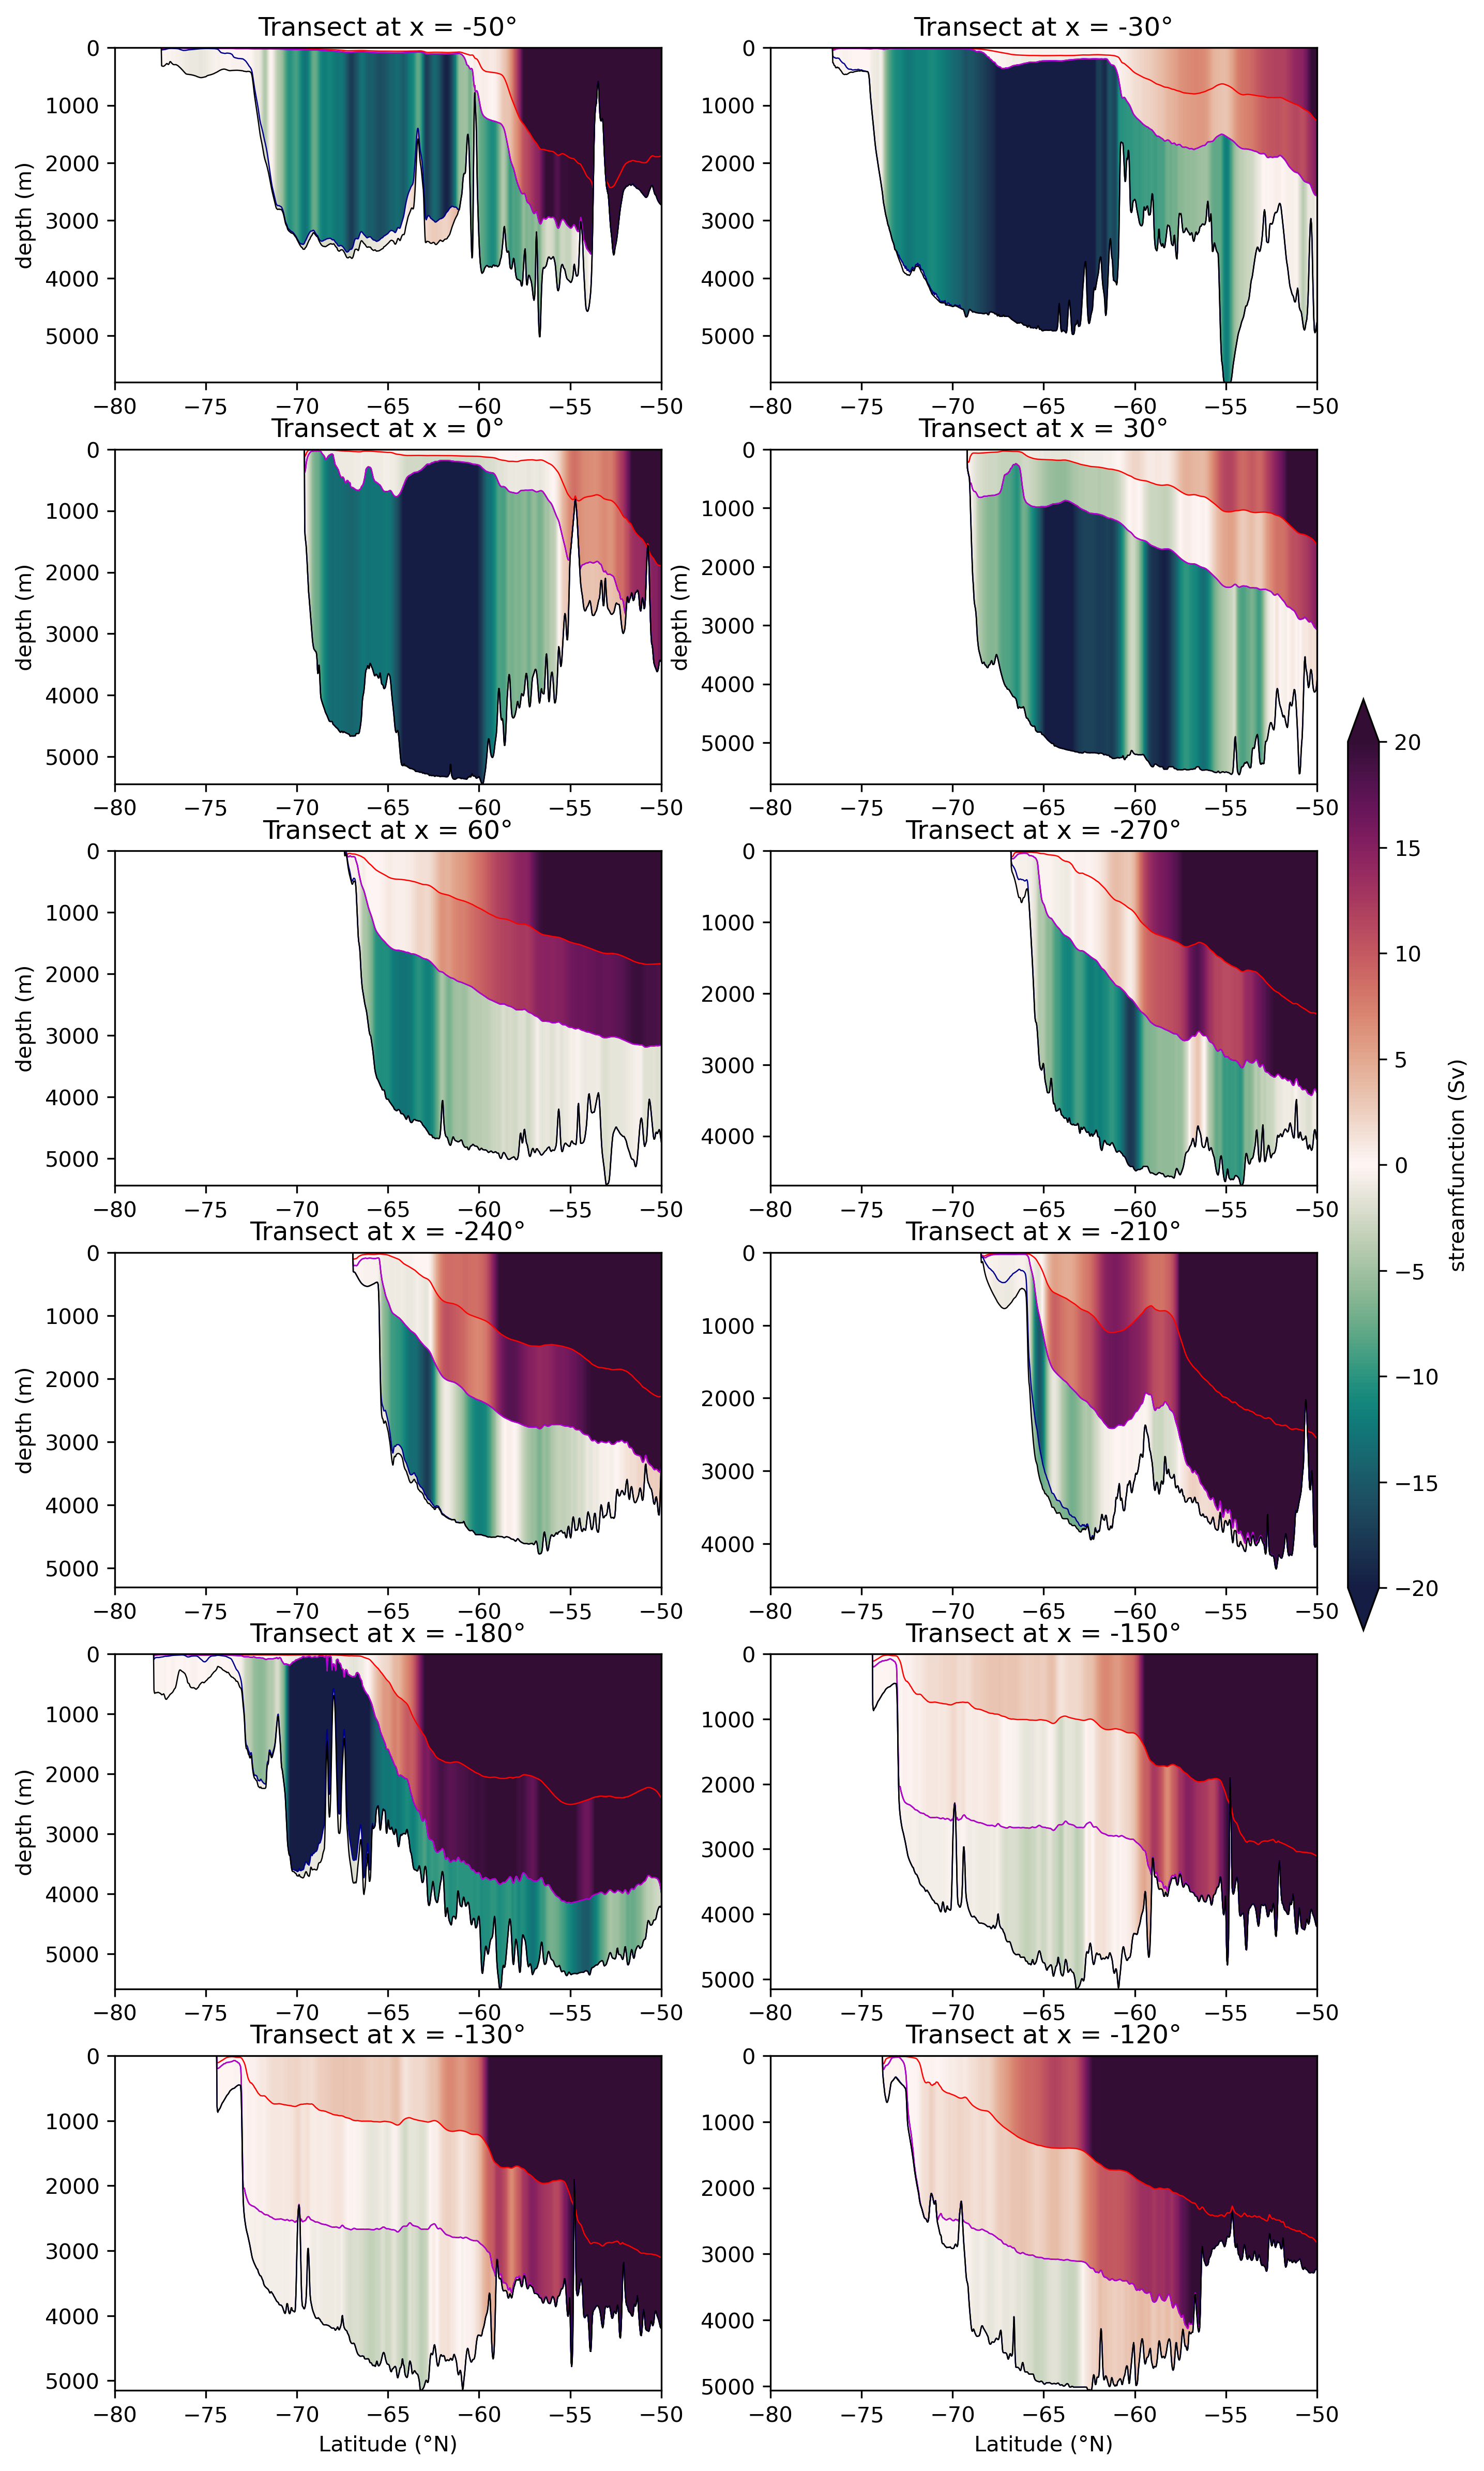

In [46]:
plt.figure(figsize=(10,20),dpi = 300)
# -50
plt.subplot(6,2,1)
p1 = plt.pcolor(flux1.yh.values,depth1,fluxes1[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth1[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = -50°')
plt.xlim(-80,-50)
plt.ylabel('depth (m)')


# -30
plt.subplot(6,2,2)
p1 = plt.pcolor(flux1.yh.values,depth2,fluxes2[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth2[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = -30°')
plt.xlim(-80,-50)


# 0
plt.subplot(6,2,3)
p1 = plt.pcolor(flux1.yh.values,depth3,fluxes3[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth3[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = 0°')
plt.xlim(-80,-50)
plt.ylabel('depth (m)')


# 30
plt.subplot(6,2,4)
p1 = plt.pcolor(flux1.yh.values,depth4,fluxes4[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth4[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = 30°')
plt.xlim(-80,-50)
plt.ylabel('depth (m)')


# 60
plt.subplot(6,2,5)
p1 = plt.pcolor(flux1.yh.values,depth5,fluxes5[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth5[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = 60°')
plt.xlim(-80,-50)
plt.ylabel('depth (m)')

# -270
plt.subplot(6,2,6)
p1 = plt.pcolor(flux1.yh.values,depth6,fluxes6[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth6[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = -270°')
plt.xlim(-80,-50)


# -240
plt.subplot(6,2,7)
p1 = plt.pcolor(flux1.yh.values,depth7,fluxes7[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth7[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = -240°')
plt.xlim(-80,-50)
plt.ylabel('depth (m)')

# -210
plt.subplot(6,2,8)
p1 = plt.pcolor(flux1.yh.values,depth8,fluxes8[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth8[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = -210°')
plt.xlim(-80,-50)


# -180
plt.subplot(6,2,9)
p1 = plt.pcolor(flux1.yh.values,depth9,fluxes9[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth9[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = -180°')
plt.xlim(-80,-50)
plt.ylabel('depth (m)')

# -150
plt.subplot(6,2,10)
p1 = plt.pcolor(flux1.yh.values,depth10,fluxes10[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth10[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = -150°')
plt.xlim(-80,-50)


# -130
plt.subplot(6,2,11)
p1 = plt.pcolor(flux1.yh.values,depth11,fluxes11[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth11[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = -130°')
plt.xlim(-80,-50)
plt.xlabel('Latitude (°N)')

# -120
plt.subplot(6,2,12)
p1 = plt.pcolor(flux1.yh.values,depth12,fluxes12[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1.yh.values,depth12[ii,:],color = c[ii],label=label[ii],linewidth = 0.6)
plt.gca().invert_yaxis()
plt.title('Transect at x = -120°')
plt.xlim(-80,-50)
plt.xlabel('Latitude (°N)')

# add colorbar
ax = plt.axes([0.92, 0.37, 0.02, 0.3])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend = 'both')
cb.ax.set_ylabel('streamfunction (Sv)')